**Brian Blaylock**  
*January 13, 2021*

# Solar Ultraviolet Imager
Yes, there is even solar ultraviolet data from the GOES instrument on AWS.

In [44]:
from goes2go import GOES
import pandas as pd

G = GOES(satellite=18,product='SUVI-L1b-Fe195')
dates = pd.date_range("2025-04-01","2025-05-01",freq="12h")
data = [G.nearesttime(date) for date in dates]

domain argument is ignored for non-ABI products


 👮🏻‍♂️ File already exists. Do not overwrite: /home/rymcclure/data/noaa-goes18/SUVI-L1b-Fe195/2025/090/23/OR_SUVI-L1b-Fe195_G18_s20250902359438_e20250902359448_c20250910000089.nc
📦 Finished downloading [1] files to [/home/rymcclure/data/noaa-goes18/SUVI-L1b-Fe195].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

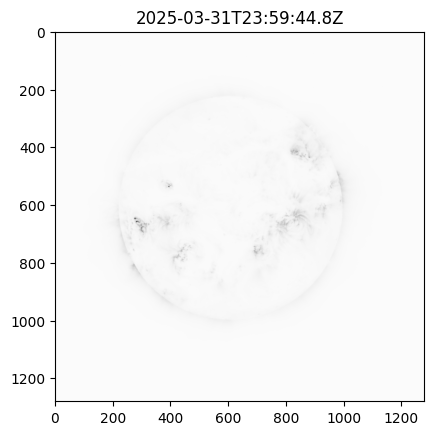

In [46]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
#from IPython.display import HTML

fig, ax = plt.subplots(1,1)
img = ax.imshow(data[0].RAD,cmap='Grays')

def update(frame):
    ax.set_title(data[frame].time_coverage_end)
    img.set_array(data[frame].RAD)
    return [img]

ani = FuncAnimation(fig,update,len(data))
ani.save('SUVI.gif',writer='pillow',fps=12)
#display(HTML(ani.to_jshtml()))

In [ ]:
from goes2go import GOES
import pandas as pd
import numpy as np

G = GOES(satellite=19,product='ccor1-l1b')
dates = pd.date_range("2025-04-02 16:00","2025-05-01 16:00",freq="1D")
data = [G.nearesttime(date) for date in dates]
bg = np.mean([d.hdu1.values for d in data],axis=0)
dates = pd.date_range("2025-04-22 08:00","2025-04-22 10:00",freq="15min")
data = [G.nearesttime(date) for date in dates]

domain argument is ignored for non-ABI products


 👮🏻‍♂️ File already exists. Do not overwrite: /home/rymcclure/data/noaa-nesdis-swfo-ccor-1-pds/SWFO/GOES-19/CCOR-1/ccor1-l1b/2025/04/02/CCOR1_1B_20250402T160025_V00_NC.fits
📦 Finished downloading [1] files to [/home/rymcclure/data/noaa-nesdis-swfo-ccor-1-pds/SWFO/GOES-19/CCOR-1/ccor1-l1b].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

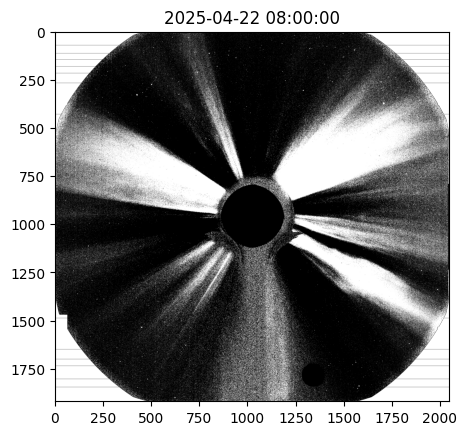

In [74]:

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
#from IPython.display import HTML

fig, ax = plt.subplots(1,1)
img = ax.imshow(data[0].hdu1-bg,vmin=0,vmax=1e-12,cmap='gist_gray')

def update(frame):
    ax.set_title(dates[frame])
    img.set_array(data[frame].hdu1-bg)
    return [img]

ani = FuncAnimation(fig,update,len(data))
ani.save('CCOR.gif',writer='pillow',fps=12)
#display(HTML(ani.to_jshtml()))